$\textbf{Empirical Exercise-Week 7}$  Page 474, Problem 9.33
Exchange Rates

In [1]:
clear all
addpath(genpath('c:\LeSage7'));
Tab1 = readtable('xrate.csv');

To avoid ambiguity, supply a datetime format using SETVAROPTS, e.g. 
  opts = setvaropts(opts,varname,'InputFormat','MM/dd/uuuu');
> In matlab.io.internal.readers/TextDataReader/read (line 103)
  In matlab.io.internal.functions/ReadTableWithImportOptionsText/executeImpl (line 57)
  In matlab.io.internal.functions/ReadTableWithImportOptions/executeImpl (line 22)
  In matlab.io.internal.functions/ReadTableWithImportOptionsText/execute (line 62)
  In matlab.io.internal.functions/ReadTableWithImportOptions/execute (line 34)
  In matlab.io.internal.functions/ReadTable/execute (line 40)
  In matlab.io.internal.functions/ExecutableFunction/validateAndExecute (line 98)
  In readtable (line 195)



In [3]:
Tab1(1,:)


ans =

  1x6 table

     dateid01     di6_aus    di6_us    inf_aus    inf_us    ner 
    __________    _______    ______    _______    ______    ____

    01/01/1986      NaN       NaN        NaN       NaN      71.6




In [51]:
di6_aus = table2array(Tab1(:,2)); di6_us = table2array(Tab1(:,3));
inf_aus = table2array(Tab1(:,4));  inf_us = table2array(Tab1(:,5));
ner = table2array(Tab1(:,6));
date1 = table2cell(Tab1(:,1));
% date2 = datetime(date1);

In [52]:
date2 = table2array(Tab1(:,1));  % read in date vector


In [53]:
date1 = datetime(date2);   % Convert to a date vector


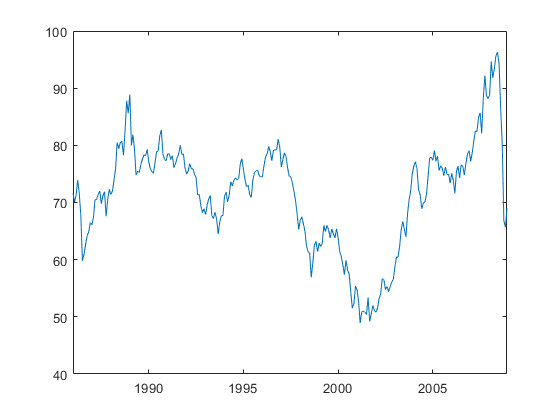

In [15]:
plot(date1,ner)   % Plot of nominal exchange rate between US and Australia: US cents 
% cost of one AUS dollar; cheaper AUS dollar means appreciation of US dollar

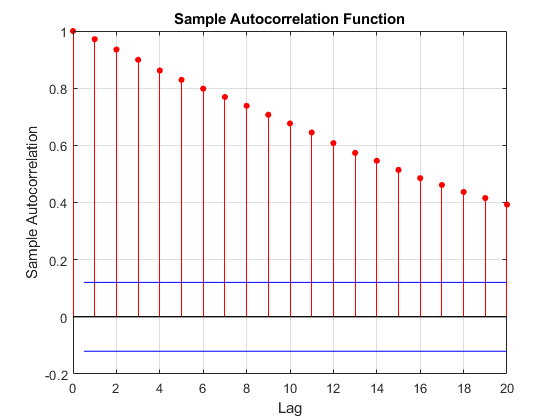

In [20]:
autocorr(ner);  % autocorrelation function;  high degree of persistence

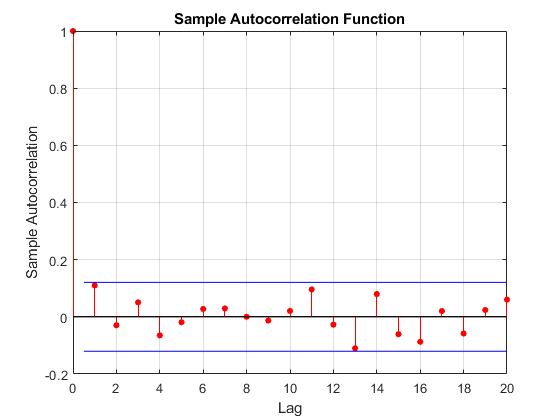

In [54]:
Dner = diff(log(ner));  % log first differenced exchange rate;
autocorr(Dner);
% Dramatic difference in autocorrelation function

In [55]:
Dinf = inf_aus - inf_us;  Di6 = di6_aus - di6_us;
y = Dner(2:end,1);
size(y);
size(Dinf);
size(Di6);
x = [ones(length(y),1) Dinf(2:275,:) Dinf(1:274,:) Di6(2:275,:) Di6(1:274,:)];
y = y(2:end,:); x = x(2:end,:);



In [37]:
results1 = ols(y,x);
[results1.beta results1.tstat]


ans =

   -0.0005   -0.2482
    0.0022    0.7079
   -0.0006   -0.1974
    0.0005    2.1042
    0.0002    0.7663




We see that the current interest different is the only significant regressor. Current inflation has the wrong sign, for sure.  But it is insignificant.
We drop regressors with the wrong sign.


In [56]:
xx = x(:,[1 3 4 5]);
results2 = ols(y,xx);
[results2.beta, results2.tstat]


ans =

   -0.0004   -0.1875
   -0.0011   -0.3594
    0.0005    2.2716
    0.0002    0.7954




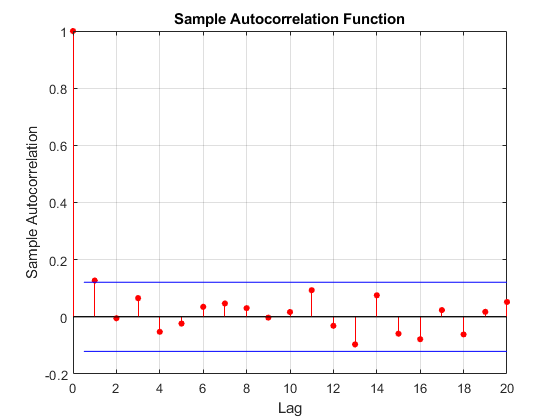

In [41]:
ehat = results2.resid;   % Examine residuals
autocorr(ehat)

Residuals look good by the autocorrelogram.

Breusch–Godfrey serial correlation LM

In [42]:
yyy = ehat(2:end,:);  xxx= [ones(length(yyy),1) ehat(1:end-1,1)];

In [51]:
results4 = ols(yyy,xxx);
[results4.beta results4.tstat]
results4.rsqr


ans =

   -0.0001   -0.0705
    0.1272    2.1117


ans =

    0.0162




In [49]:
nn = ((length(yyy))-2);
LMstat = nn * results4.rsqr;
LMstat


LMstat =

    4.3869




In [53]:
LMcdf = chi2cdf(LMstat,2);
1 - LMcdf


ans =

    0.1115




Close call on the LM test.

In [54]:
help fgls
[coeff, se] = fgls(x)

 FGLS Feasible Generalized Least Squares
 
  Syntax:
 
    [coeff,se,EstCoeffCov] = fgls(X,y)
    [coeff,se,EstCoeffCov] = fgls(Tbl)
    [coeff,se,EstCoeffCov] = fgls(...,param,val,...)
    [coeff,se,EstCoeffCov,iterPlots] = fgls(...)
    [coeff,se,EstCoeffCov,iterPlots] = fgls(ax,...)
 
  Description:
 
    FGLS computes generalized least squares (GLS) estimates of coefficients
    in multiple linear regression models
 
    y = X*coeff + e
 
    by first estimating the covariance of the innovations process e.
    Coefficient estimates are of the form
                
    coeff = inv(X'*inv(OmegaHat)*X)*X'*inv(OmegaHat)*y
 
    where OmegaHat is an innovations covariance estimate using a specified
    model. The process can be iterated.
 
  Input Arguments:
 
    X - numObs-by-numPreds matrix of predictor data for a multiple linear                                                                                                                                                             

In [76]:
[coeff,se]=  fgls(x(:,2:end),y,'innovMdl','AR','arLags',1,'display','final'); % ar model
[coeff1,se1]=  fgls(x(:,2:end),y,'innovMdl','CLM','display','final'); % Classsical model
[coeff2,se2]=  fgls(x(:,2:end),y,'innovMdl','HC0','display','final'); % White errors
[coeff se coeff./se]



OLS Estimates:

       |  Coeff     SE   
-------------------------
 Const | -0.0005  0.0019 
 x1    |  0.0022  0.0031 
 x2    | -0.0006  0.0032 
 x3    |  0.0005  0.0002 
 x4    |  0.0002  0.0003 

FGLS Estimates:

       |  Coeff     SE   
-------------------------
 Const | -0.0005  0.0022 
 x1    |  0.0028  0.0030 
 x2    | -0.0001  0.0031 
 x3    |  0.0006  0.0002 
 x4    |  0.0001  0.0003 

OLS Estimates:

       |  Coeff     SE   
-------------------------
 Const | -0.0005  0.0019 
 x1    |  0.0022  0.0031 
 x2    | -0.0006  0.0032 
 x3    |  0.0005  0.0002 
 x4    |  0.0002  0.0003 

FGLS Estimates:

       |  Coeff     SE   
-------------------------
 Const | -0.0005  0.0019 
 x1    |  0.0022  0.0031 
 x2    | -0.0006  0.0032 
 x3    |  0.0005  0.0002 
 x4    |  0.0002  0.0003 

OLS Estimates:

       |  Coeff     SE   
-------------------------
 Const | -0.0005  0.0019 
 x1    |  0.0022  0.0031 
 x2    | -0.0006  0.0032 
 x3    |  0.0005  0.0002 
 x4    |  0.0002  0.0003 

FG

 We see that the same coefficient is significant, the one for the current interest rate diffential.

Lets run a one month ahead forecasting equation:

In [57]:
Dinf = inf_aus - inf_us;  Di6 = di6_aus - di6_us;
y = Dner(2:end,1);
x = [ones(length(y),1) Dner(1:end-1,:) Dinf(1:274,:)  Di6(1:274,:)];
ynew = y(2:end,:); xnew = x(2:end,:);
results5 = ols(ynew, xnew);
[results5.beta results5.tstat]


ans =

   -0.0001   -0.0651
    0.1044    1.7045
   -0.0009   -0.2897
    0.0003    1.1501




In [58]:
results6 = ols(y(2:261,1),x(2:261,:));
betaxxx = results6.beta;
yfor = x(262:end,:)*betaxxx;
ehat_for = y(262:end,:)-yfor;
rmsq = sum(ehat_for.^2)/length(ehat_for);  % root mean squared error
absrmsq = rmsq^.5;
absrmsq



absrmsq =

    0.0643




In [9]:

epsilon=randn(1000,1)*.01;


In [10]:
y(1,1)=1;


In [22]:
for i =2:1000, y(i) =0+ .9999*y(i-1)+epsilon(i);end

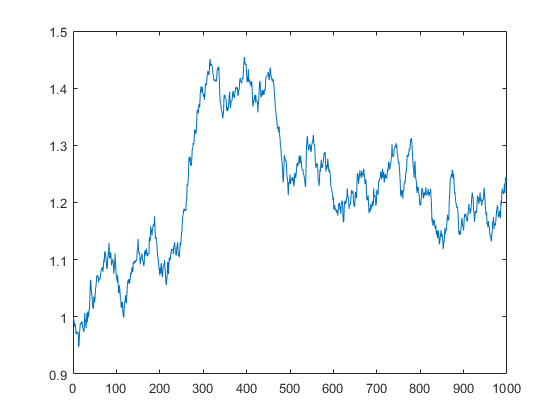

In [24]:
plot(y)

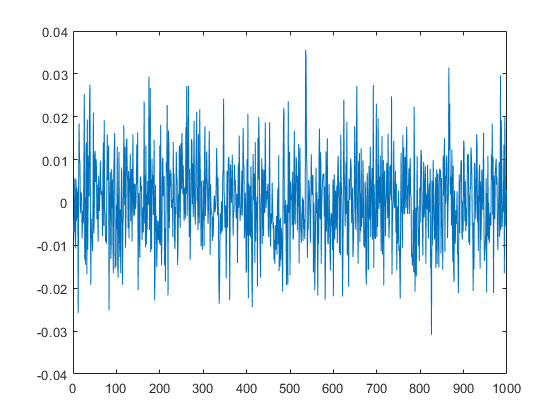

In [25]:
yy = diff(y);
plot(yy)